###  Modelo_Pred_Gen_Edad_partir_de_consumo

In [1]:
import pandas as pd
import numpy as np
import gc
from datetime import datetime
from itertools import compress
from collections import Counter
#import seaborn as sns
import matplotlib.pyplot as plt
from joblib import load,dump
import re
from sklearn.model_selection import KFold
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import pydot
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error,  mean_squared_error

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
np.set_printoptions(suppress=True)

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
df1 = pd.read_csv(f'tabla1_cp5.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
#dfColumns = artists_billboard.drop(drop_elements, axis = 1)

In [7]:
drop_elements = ['Unnamed: 0','CO_ID','IDENTIFICACION','selContID']

In [8]:
df1 = df1[df1['selContID']=='val']

In [9]:
df = df1.drop(drop_elements, axis = 1)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

POROUT  TOTAL_MB_WHATSAPP  TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  \
0       0             -1.000                       -1.000             -1.000   
1       1             -1.000                       -1.000             -1.000   
2       1            271.000                       69.000              0.000   
3       1              1.000                        0.000              0.000   
4       1              0.000                        0.000              0.000   

   TOTAL_MB_INSTAGRAM  TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  \
0              -1.000            -1.000                -1.000   
1              -1.000            -1.000                -1.000   
2             149.000            42.000                 0.000   
3               0.000             0.000                 0.000   
4               0.000             0.000                 0.000   

   CONSUMO_TOTAL_MB  CANT_PAQ_MAS_COMPRADO_MES  VLR_PAQ_MAS_COMPRADO_MES  \
0            -1.000                      0.000                     0.000   
1            -1.000                      0.000                     0.000   
2           850.000                      3.000                 -6000.000   
3             3.000                      0.000                     0.000   
4             0.000                      0.000                     0.000   

   ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
0                 NaN                            NaN            NaN   
1                 NaN                            NaN            NaN   
2            6560.000                          0.000          1.000   
3            6524.000                          0.000          1.000   
4            6576.000                          0.000          1.000   

   CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
0                               0.000                              0.000   
1                               0.000                              0.000   
2                               2.000                          -3000.000   
3                               0.000                              0.000   
4                               2.000                          -4000.000   

   ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
0                 6605                NaN                NaN   
1                 6591            231.667                NaN   
2                 6591            403.874            168.898   
3                 6585            411.850            195.618   
4                 6576            395.286             85.592   

   STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                  0.418              dispersed              109.164   
3                  0.475              dispersed             -120.375   
4                  0.217                 united               41.538   

   slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
0                      NaN                      NaN             NaN   
1                      NaN                      NaN     1205011.764   
2                    0.270                 increase      802897.989   
3                   -0.292                 decrease      381114.714   
4                    0.105                 increase     5436421.489   

   STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  slope_PROM_DATOS  \
0             NaN                 NaN                 NaN               NaN   
1     2389390.761               1.983           dispersed      -1428486.633   
2     1395627.707               1.738           dispersed        830992.691   
3             NaN                 NaN                 NaN               NaN   
4     9365348.847               1.723           dispersed        546769.880   

   slope_cat_PROM_DATOS slope_cat2_PROM_DATOS  avg_PROMEDIO_SALDO  \
0

In [ ]:
# Des Edad

<AxesSubplot:>

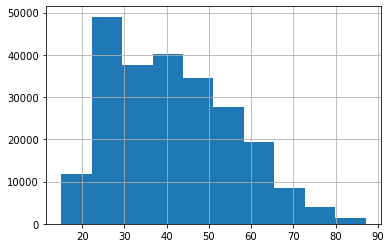

In [12]:
df.EDAD.hist()

<AxesSubplot:>

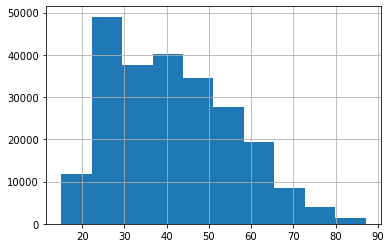

In [19]:
df.EDAD.hist()

In [50]:
xcol=['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE', 'CONSUMO_TOTAL_MB',
       'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO','catEdad'] #catEdad

In [52]:
df[xcol].groupby('catEdad').agg(['count','mean'])

part_TOTAL_MB_INSTAGRAM       part_TOTAL_MB_TWITTER_Y_FACEBOOK        \
                          count  mean                            count  mean   
catEdad                                                                        
0.000                      1872 0.021                             1872 0.281   
20.000                    28595 0.020                            28595 0.262   
25.000                    35039 0.016                            35039 0.244   
30.000                    26225 0.012                            26225 0.231   
35.000                    25845 0.011                            25845 0.215   
40.000                    26898 0.011                            26898 0.205   
45.000                    23521 0.011                            23521 0.202   
50.000                    21105 0.010                            21105 0.191   
55.000                    16957 0.008                            16957 0.174   
60.000                    27867 0.006                            27867 0.141   

        part_TOTAL_MB_WHATSAPP       part_TOTAL_MB_YOUTUBE        \
                         count  mean                 count  mean   
catEdad                                                            
0.000                     1872 0.134                  1872 0.046   
20.000                   28595 0.124                 28595 0.046   
25.000                   35039 0.120                 35039 0.051   
30.000                   26225 0.117                 26225 0.053   
35.000                   25845 0.115                 25845 0.053   
40.000                   26898 0.115                 26898 0.054   
45.000                   23521 0.114                 23521 0.057   
50.000                   21105 0.110                 21105 0.057   
55.000                   16957 0.104                 16957 0.059   
60.000                   27867 0.091                 27867 0.057   

        CONSUMO_TOTAL_MB          avg_PROM_DATOS              \
                   count     mean          count        mean   
catEdad                                                        
0.000               1872 4294.831           1785 7035762.032   
20.000             28595 4143.470          26212 6940109.573   
25.000             35039 3805.148          31631 6428927.117   
30.000             26225 3426.616          23421 5914597.267   
35.000             25845 2933.136          22816 5151607.386   
40.000             26898 2646.913          23743 4818701.319   
45.000             23521 2393.372          20662 4490768.482   
50.000             21105 2188.104          18377 4253484.358   
55.000             16957 2038.911          14535 4038764.431   
60.000             27867 1785.529          22604 3867127.910   

        avg_PROMEDIO_SALDO           
                     count     mean  
catEdad                              
0.000                 1780  532.986  
20.000               26966  585.149  
25.000               32555  572.206  
30.000               24231  649.322  
35.000               23805  802.054  
40.000               24730  822.828  
45.000               21816  983.705  
50.000               19607 1050.625  
55.000               15819 1324.181  
60.000               25985 2136.382

In [54]:
df['conTotal']=df.filter(regex='^part_TOTAL').sum(axis=1)

In [63]:
df=df[df['conTotal']<=1]

<AxesSubplot:>

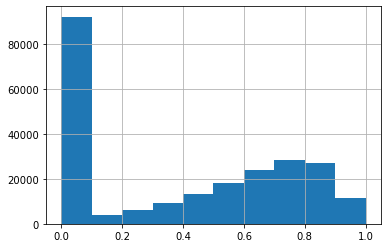

In [64]:
df['conTotal'].hist()

In [57]:
#df[df['conTotal']>1]
df['conTotal'].value_counts()

0.000    89837
0.500      329
0.333      217
1.000      203
0.667      183
0.250      180
0.200      149
0.500      134
0.750      132
0.167      115
0.400      110
0.667      101
0.333       96
0.143       95
0.600       79
0.800       66
0.625       66
0.286       65
0.600       62
0.125       62
0.571       60
0.750       59
0.833       58
0.429       56
0.778       53
0.222       52
0.375       50
0.857       49
0.556       47
0.714       47
0.100       47
0.889       46
0.545       43
0.500       43
0.700       43
0.111       42
0.600       41
0.800       40
0.083       40
0.182       40
0.818       39
0.571       38
0.273       38
0.455       37
0.300       37
0.444       37
0.091       36
0.769       36
0.400       35
0.071       35
0.750       34
0.250       34
0.231       34
0.875       34
0.300       33
0.364       33
0.900       33
0.583       33
0.429       32
0.833       31
0.857       31
0.562       31
0.333       31
0.214       31
0.067       31
0.308       31
0.647     

<AxesSubplot:>

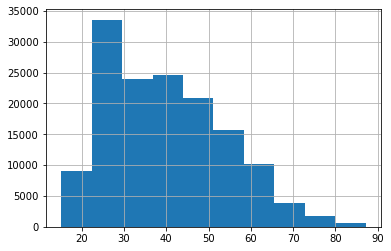

In [58]:
df[df['conTotal']>0]['EDAD'].hist()

<AxesSubplot:>

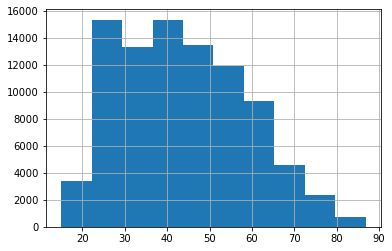

In [59]:
df[df['conTotal']==0]['EDAD'].hist()

<AxesSubplot:>

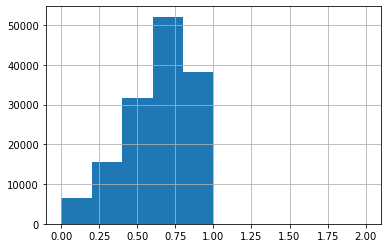

In [60]:
df[df['conTotal']>0]['conTotal'].hist()

<AxesSubplot:xlabel='conTotal', ylabel='EDAD'>

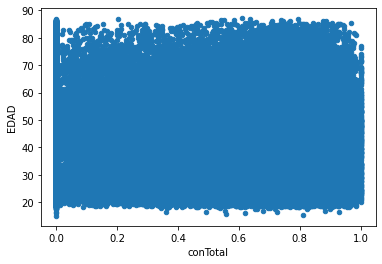

In [65]:
df.plot.scatter(x='conTotal', y='EDAD')

<AxesSubplot:xlabel='part_TOTAL_MB_TWITTER_Y_FACEBOOK', ylabel='EDAD'>

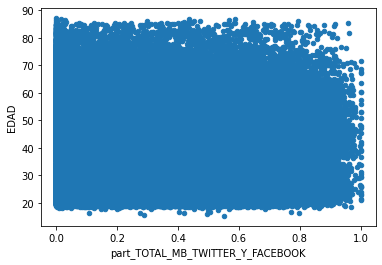

In [69]:
df[df['conTotal']>0].plot.scatter(x='part_TOTAL_MB_TWITTER_Y_FACEBOOK', y='EDAD')

<AxesSubplot:xlabel='part_TOTAL_MB_WHATSAPP', ylabel='part_TOTAL_MB_TWITTER_Y_FACEBOOK'>

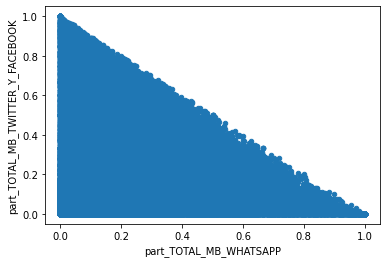

In [70]:
df[df['conTotal']>0].plot.scatter(x='part_TOTAL_MB_WHATSAPP', y='part_TOTAL_MB_TWITTER_Y_FACEBOOK')

In [ ]:
df[df['conTotal']>0].plot.scatter(x='conTotal', y='EDAD')

In [71]:
df['avg_PROM_DATOS'].isnull().sum()

28138

In [ ]:
df['avg_PROM_DATOS'].isnull().sum()

In [73]:
df['avg_PROMEDIO_SALDO'].isnull().sum()

16630

In [78]:
df[['avg_PROM_DATOS','avg_PROMEDIO_SALDO']].isnull().any(axis=1).sum()

36429

In [72]:
len(df)

233925

In [ ]:
# Fin Des Edad

In [13]:
df['catEdad']=np.where(df['EDAD']<20,0,np.where(df['EDAD']>60,60, 5*(df['EDAD']//5)))

In [14]:
df.sample(10)

POROUT  TOTAL_MB_WHATSAPP  TOTAL_MB_TWITTER_Y_FACEBOOK  \
176483       1           4741.000                     4416.000   
176500       1              0.000                        0.000   
57467        1              0.000                        0.000   
8965         1             -1.000                       -1.000   
124960       1            809.000                      498.000   
24920        1             99.000                      896.000   
87183        1             -1.000                       -1.000   
192382       1            405.000                     4213.000   
219195       1           1206.000                    11055.000   
125834       1            879.000                     2337.000   

        TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  TOTAL_MB_YOUTUBE  \
176483              1.000               1.000           463.000   
176500              0.000               0.000             0.000   
57467               0.000               0.000             0.000   
8965               -1.000              -1.000            -1.000   
124960              1.000              38.000            96.000   
24920               9.000               3.000            29.000   
87183              -1.000              -1.000            -1.000   
192382              3.000               0.000           775.000   
219195              2.000              15.000           346.000   
125834              0.000               6.000           110.000   

        TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  CANT_PAQ_MAS_COMPRADO_MES  \
176483                 0.000         14617.000                      0.000   
176500                 0.000             0.000                     17.000   
57467                  0.000             3.000                      0.000   
8965                  -1.000            -1.000                      0.000   
124960                14.000          2018.000                      0.000   
24920                  0.000          1767.000                      0.000   
87183                 -1.000            -1.000                      0.000   
192382                 0.000          6820.000                      0.000   
219195                 0.000         14627.000                      1.000   
125834                 0.000          3775.000                      0.000   

        VLR_PAQ_MAS_COMPRADO_MES  ANTIGUEDAD_USUARIO  \
176483                     0.000             188.000   
176500                -17000.000              88.000   
57467                      0.000            1522.000   
8965                       0.000                 NaN   
124960                     0.000             584.000   
24920                      0.000                 NaN   
87183                      0.000                 NaN   
192382                     0.000             102.000   
219195                 -2000.000                 NaN   
125834                     0.000                 NaN   

        TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
176483                       1500.000          1.000   
176500                          0.000          1.000   
57467                             NaN          1.000   
8965                              NaN            NaN   
124960                          0.000          1.000   
24920                           0.000          1.000   
87183                             NaN            NaN   
192382                          0.000          1.000   
219195                          0.000          1.000   
125834                          0.000          1.000   

        CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
176483                               0.000                              0.000   
176500                               0.000                              0.000   
57467                                0.000                              0.000   
8965                                 0.000                              0.000   
124960                               0.000              

In [17]:
dfFinal=df.copy()

In [18]:
#quitar datos sin fecha
dfFinal=dfFinal[dfFinal['EDAD'].notnull()]

<AxesSubplot:>

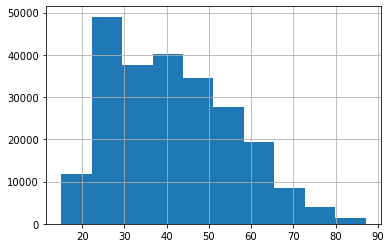

In [20]:
dfFinal.EDAD.hist()

In [21]:
dfFinal[dfFinal['EDAD'].isnull()]

Empty DataFrame
Columns: [POROUT, TOTAL_MB_WHATSAPP, TOTAL_MB_TWITTER_Y_FACEBOOK, TOTAL_MB_SNAPCHAT, TOTAL_MB_INSTAGRAM, TOTAL_MB_YOUTUBE, TOTAL_MB_GOOGLE_MAPS, CONSUMO_TOTAL_MB, CANT_PAQ_MAS_COMPRADO_MES, VLR_PAQ_MAS_COMPRADO_MES, ANTIGUEDAD_USUARIO, TOTAL_VALOR_DE_ADELANTA_SALDO, ES_SMARTPHONE, CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR, VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR, ACTIGUEDAD_ACT_BSCS, avg_PROM_SEGUNDOS, STD_PROM_SEGUNDOS, STD_cat_PROM_SEGUNDOS, STD_cat2_PROM_SEGUNDOS, slope_PROM_SEGUNDOS, slope_cat_PROM_SEGUNDOS, slope_cat2_PROM_SEGUNDOS, avg_PROM_DATOS, STD_PROM_DATOS, STD_cat_PROM_DATOS, STD_cat2_PROM_DATOS, slope_PROM_DATOS, slope_cat_PROM_DATOS, slope_cat2_PROM_DATOS, avg_PROMEDIO_SALDO, STD_PROMEDIO_SALDO, STD_cat_PROMEDIO_SALDO, STD_cat2_PROMEDIO_SALDO, slope_PROMEDIO_SALDO, slope_cat_PROMEDIO_SALDO, slope_cat2_PROMEDIO_SALDO, paq_datos, paq_empresas, paq_facebook, paq_Instagram, paq_LargaDistancia, paq_migracion, paq_minutos, paq_pasatiempo, paq_sinpaquete, paq_sms, paq_snapchat, paq_speedy, paq_suscripcion, paq_todoIncluido, paq_twitter, paq_waze, paq_ws, paq_wtf, paq_youtube, paq_datos_v, paq_datos_q, paq_empresas_v, paq_empresas_q, paq_facebook_v, paq_facebook_q, paq_Instagram_v, paq_Instagram_q, paq_LargaDistancia_v, paq_LargaDistancia_q, paq_migracion_v, paq_migracion_q, paq_minutos_v, paq_minutos_q, paq_pasatiempo_v, paq_pasatiempo_q, paq_sinpaquete_v, paq_sinpaquete_q, paq_sms_v, paq_sms_q, paq_snapchat_v, paq_snapchat_q, paq_speedy_v, paq_speedy_q, paq_suscripcion_v, paq_suscripcion_q, paq_todoIncluido_v, paq_todoIncluido_q, paq_twitter_v, paq_twitter_q, paq_waze_v, paq_waze_q, paq_ws_v, paq_ws_q, paq_wtf_v, paq_wtf_q, paq_youtube_v, paq_youtube_q, t_viajero, tipo_ACT, part_TOTAL_MB_WHATSAPP, part_TOTAL_MB_TWITTER_Y_FACEBOOK, part_TOTAL_MB_SNAPCHAT, part_TOTAL_MB_INSTAGRAM, ...]
Index: []

In [22]:
res_prom=df[['catEdad','avg_PROM_DATOS','avg_PROMEDIO_SALDO']].groupby('catEdad').mean()
res_prom.rename(columns={'avg_PROM_DATOS': 'res_avg_PROM_DATOS', 'avg_PROMEDIO_SALDO': 'res_avg_PROMEDIO_SALDO'}, inplace=True)
res_prom

res_avg_PROM_DATOS  res_avg_PROMEDIO_SALDO
catEdad                                            
0.000           7035762.032                 532.986
20.000          6940109.573                 585.149
25.000          6428927.117                 572.206
30.000          5914597.267                 649.322
35.000          5151607.386                 802.054
40.000          4818701.319                 822.828
45.000          4490768.482                 983.705
50.000          4253484.358                1050.625
55.000          4038764.431                1324.181
60.000          3867127.910                2136.382

#### Selección de variables para el modelo 

In [23]:
varSel=['part_TOTAL_MB_INSTAGRAM','part_TOTAL_MB_TWITTER_Y_FACEBOOK','part_TOTAL_MB_WHATSAPP','part_TOTAL_MB_YOUTUBE',
       'CONSUMO_TOTAL_MB','avg_PROM_DATOS','avg_PROMEDIO_SALDO',
       'EDAD','Gen','catEdad']

In [24]:
dfFinal=dfFinal[varSel]

In [25]:
len(dfFinal)

233924

In [26]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.120
avg_PROMEDIO_SALDO                 0.071
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
dtype: float64

In [27]:
dfFinal=dfFinal.merge(res_prom,left_on='catEdad',right_on='catEdad',how='left')

In [28]:
dfFinal.head(10)

part_TOTAL_MB_INSTAGRAM  part_TOTAL_MB_TWITTER_Y_FACEBOOK  \
0                    0.000                             0.000   
1                    0.000                             0.000   
2                    0.175                             0.081   
3                    0.000                             0.000   
4                    0.000                             0.000   
5                    0.000                             0.000   
6                    0.000                             0.353   
7                    0.000                             0.000   
8                    0.000                             0.000   
9                    0.143                             0.214   

   part_TOTAL_MB_WHATSAPP  part_TOTAL_MB_YOUTUBE  CONSUMO_TOTAL_MB  \
0                   0.000                  0.000            -1.000   
1                   0.000                  0.000            -1.000   
2                   0.319                  0.049           850.000   
3                   0.333                  0.000             3.000   
4                   0.000                  0.000             0.000   
5                   0.773                  0.000            22.000   
6                   0.228                  0.127          2054.000   
7                   0.000                  0.000            -1.000   
8                   0.000                  0.000             0.000   
9                   0.069                  0.018          6199.000   

   avg_PROM_DATOS  avg_PROMEDIO_SALDO   EDAD Gen  catEdad  res_avg_PROM_DATOS  \
0             NaN                 NaN 43.432   M   40.000         4818701.319   
1     1205011.764            2258.065 54.792   M   50.000         4253484.358   
2      802897.989            4925.580 61.881   H   60.000         3867127.910   
3      381114.714               0.000 42.822   M   40.000         4818701.319   
4     5436421.489            9547.128 49.735   H   45.000         4490768.482   
5      276137.588            2835.703 43.792   M   40.000         4818701.319   
6     4739278.597               4.170 60.253   M   60.000         3867127.910   
7             NaN            2692.220 40.325   H   40.000         4818701.319   
8         885.177           19408.218 53.719   M   50.000         4253484.358   
9    10951550.812            2820.134 45.597   M   45.000         4490768.482   

   res_avg_PROMEDIO_SALDO  
0                 822.828  
1                1050.625  
2                2136.382  
3                 822.828  
4                 983.705  
5                 822.828  
6                2136.382  
7                 822.828  
8                1050.625  
9                 983.705

In [29]:
dfFinal['avg_PROM_DATOS']=np.where(dfFinal['avg_PROM_DATOS'].isnull(),dfFinal['res_avg_PROM_DATOS'],dfFinal['avg_PROM_DATOS'])
dfFinal['avg_PROMEDIO_SALDO']=np.where(dfFinal['avg_PROMEDIO_SALDO'].isnull(),dfFinal['res_avg_PROMEDIO_SALDO'],dfFinal['avg_PROMEDIO_SALDO'])

In [30]:
dfFinal.head(10)

part_TOTAL_MB_INSTAGRAM  part_TOTAL_MB_TWITTER_Y_FACEBOOK  \
0                    0.000                             0.000   
1                    0.000                             0.000   
2                    0.175                             0.081   
3                    0.000                             0.000   
4                    0.000                             0.000   
5                    0.000                             0.000   
6                    0.000                             0.353   
7                    0.000                             0.000   
8                    0.000                             0.000   
9                    0.143                             0.214   

   part_TOTAL_MB_WHATSAPP  part_TOTAL_MB_YOUTUBE  CONSUMO_TOTAL_MB  \
0                   0.000                  0.000            -1.000   
1                   0.000                  0.000            -1.000   
2                   0.319                  0.049           850.000   
3                   0.333                  0.000             3.000   
4                   0.000                  0.000             0.000   
5                   0.773                  0.000            22.000   
6                   0.228                  0.127          2054.000   
7                   0.000                  0.000            -1.000   
8                   0.000                  0.000             0.000   
9                   0.069                  0.018          6199.000   

   avg_PROM_DATOS  avg_PROMEDIO_SALDO   EDAD Gen  catEdad  res_avg_PROM_DATOS  \
0     4818701.319             822.828 43.432   M   40.000         4818701.319   
1     1205011.764            2258.065 54.792   M   50.000         4253484.358   
2      802897.989            4925.580 61.881   H   60.000         3867127.910   
3      381114.714               0.000 42.822   M   40.000         4818701.319   
4     5436421.489            9547.128 49.735   H   45.000         4490768.482   
5      276137.588            2835.703 43.792   M   40.000         4818701.319   
6     4739278.597               4.170 60.253   M   60.000         3867127.910   
7     4818701.319            2692.220 40.325   H   40.000         4818701.319   
8         885.177           19408.218 53.719   M   50.000         4253484.358   
9    10951550.812            2820.134 45.597   M   45.000         4490768.482   

   res_avg_PROMEDIO_SALDO  
0                 822.828  
1                1050.625  
2                2136.382  
3                 822.828  
4                 983.705  
5                 822.828  
6                2136.382  
7                 822.828  
8                1050.625  
9                 983.705

In [31]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.000
avg_PROMEDIO_SALDO                 0.000
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
res_avg_PROM_DATOS                 0.000
res_avg_PROMEDIO_SALDO             0.000
dtype: float64

In [189]:
df.index.values

array([     0,      1,      2, ..., 233923, 233924, 233925], dtype=int64)

In [79]:
dfFinal.columns.values

array(['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE',
       'CONSUMO_TOTAL_MB', 'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO', 'EDAD',
       'Gen', 'catEdad', 'res_avg_PROM_DATOS', 'res_avg_PROMEDIO_SALDO'],
      dtype=object)

In [117]:
len(dfFinal)

233924

In [118]:
dfFinal.head()

part_TOTAL_MB_INSTAGRAM  part_TOTAL_MB_TWITTER_Y_FACEBOOK  \
0                    0.000                             0.000   
1                    0.000                             0.000   
2                    0.175                             0.081   
3                    0.000                             0.000   
4                    0.000                             0.000   

   part_TOTAL_MB_WHATSAPP  part_TOTAL_MB_YOUTUBE  CONSUMO_TOTAL_MB  \
0                   0.000                  0.000            -1.000   
1                   0.000                  0.000            -1.000   
2                   0.319                  0.049           850.000   
3                   0.333                  0.000             3.000   
4                   0.000                  0.000             0.000   

   avg_PROM_DATOS  avg_PROMEDIO_SALDO   EDAD Gen  catEdad  res_avg_PROM_DATOS  \
0     4818701.319             822.828 43.432   M   40.000         4818701.319   
1     1205011.764            2258.065 54.792   M   50.000         4253484.358   
2      802897.989            4925.580 61.881   H   60.000         3867127.910   
3      381114.714               0.000 42.822   M   40.000         4818701.319   
4     5436421.489            9547.128 49.735   H   45.000         4490768.482   

   res_avg_PROMEDIO_SALDO  
0                 822.828  
1                1050.625  
2                2136.382  
3                 822.828  
4                 983.705

## Edad

In [191]:
#df[df['avg_PROM_DATOS'].isnull()]['EDAD'].hist()

###  Entrenamiento y test

In [80]:
Xvar=dfFinal.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS', 'res_avg_PROMEDIO_SALDO'])
#Xvar=dfFinal.drop(columns = ['EDAD','Gen','catEdad'])
yvar=dfFinal['catEdad']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(Xvar, yvar, test_size = 0.3, random_state = 86, shuffle= True)

In [82]:
dfFinal[dfFinal['EDAD'].isnull()]

Empty DataFrame
Columns: [part_TOTAL_MB_INSTAGRAM, part_TOTAL_MB_TWITTER_Y_FACEBOOK, part_TOTAL_MB_WHATSAPP, part_TOTAL_MB_YOUTUBE, CONSUMO_TOTAL_MB, avg_PROM_DATOS, avg_PROMEDIO_SALDO, EDAD, Gen, catEdad, res_avg_PROM_DATOS, res_avg_PROMEDIO_SALDO]
Index: []

In [83]:
X_train.columns

Index(['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE', 'CONSUMO_TOTAL_MB',
       'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO'],
      dtype='object')

<AxesSubplot:>

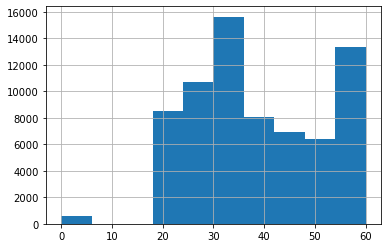

In [84]:
y_test.hist()

<AxesSubplot:>

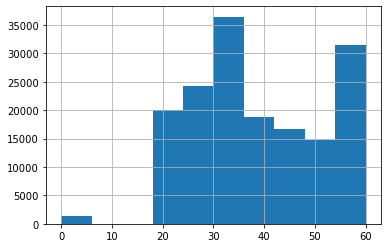

In [85]:
y_train.hist()

In [86]:
y_train.isnull().sum()

0

In [38]:
dfFinal.isnull().sum()/len(df)

part_TOTAL_MB_INSTAGRAM            0.000
part_TOTAL_MB_TWITTER_Y_FACEBOOK   0.000
part_TOTAL_MB_WHATSAPP             0.000
part_TOTAL_MB_YOUTUBE              0.000
CONSUMO_TOTAL_MB                   0.000
avg_PROM_DATOS                     0.000
avg_PROMEDIO_SALDO                 0.000
EDAD                               0.000
Gen                                0.000
catEdad                            0.000
res_avg_PROM_DATOS                 0.000
res_avg_PROMEDIO_SALDO             0.000
dtype: float64

In [88]:
#modelXgb=xgb.XGBRegressor(max_depth=80, verbosity= 5, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.04, reg_lambda=1)
#modelXgb=xgb.XGBRegressor(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='reg:squarederror', booster='gbtree', random_state=42, learning_rate=0.01, reg_lambda=1)
modelXgb=xgb.XGBClassifier(max_depth=80, verbosity= 0, subsample=0.5,  n_estimators=472, n_jobs=-1, objective='multi:softprob', booster='gbtree', random_state=42, learning_rate=0.01, reg_lambda=1)
modelXgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=5)

[0]	validation_0-mlogloss:2.28914	validation_1-mlogloss:2.29397
[1]	validation_0-mlogloss:2.27600	validation_1-mlogloss:2.28571
[2]	validation_0-mlogloss:2.26318	validation_1-mlogloss:2.27779
[3]	validation_0-mlogloss:2.25079	validation_1-mlogloss:2.27022
[4]	validation_0-mlogloss:2.23873	validation_1-mlogloss:2.26293
[5]	validation_0-mlogloss:2.22692	validation_1-mlogloss:2.25590
[6]	validation_0-mlogloss:2.21532	validation_1-mlogloss:2.24915
[7]	validation_0-mlogloss:2.20403	validation_1-mlogloss:2.24259
[8]	validation_0-mlogloss:2.19297	validation_1-mlogloss:2.23626
[9]	validation_0-mlogloss:2.18208	validation_1-mlogloss:2.23015
[10]	validation_0-mlogloss:2.17147	validation_1-mlogloss:2.22423
[11]	validation_0-mlogloss:2.16104	validation_1-mlogloss:2.21848
[12]	validation_0-mlogloss:2.15073	validation_1-mlogloss:2.21293
[13]	validation_0-mlogloss:2.14060	validation_1-mlogloss:2.20756
[14]	validation_0-mlogloss:2.13070	validation_1-mlogloss:2.20228
[15]	validation_0-mlogloss:2.12093	

[126]	validation_0-mlogloss:1.43290	validation_1-mlogloss:1.95878
[127]	validation_0-mlogloss:1.42859	validation_1-mlogloss:1.95792
[128]	validation_0-mlogloss:1.42427	validation_1-mlogloss:1.95710
[129]	validation_0-mlogloss:1.42000	validation_1-mlogloss:1.95621
[130]	validation_0-mlogloss:1.41575	validation_1-mlogloss:1.95538
[131]	validation_0-mlogloss:1.41151	validation_1-mlogloss:1.95454
[132]	validation_0-mlogloss:1.40728	validation_1-mlogloss:1.95373
[133]	validation_0-mlogloss:1.40309	validation_1-mlogloss:1.95295
[134]	validation_0-mlogloss:1.39890	validation_1-mlogloss:1.95216
[135]	validation_0-mlogloss:1.39473	validation_1-mlogloss:1.95137
[136]	validation_0-mlogloss:1.39059	validation_1-mlogloss:1.95058
[137]	validation_0-mlogloss:1.38645	validation_1-mlogloss:1.94982
[138]	validation_0-mlogloss:1.38236	validation_1-mlogloss:1.94905
[139]	validation_0-mlogloss:1.37827	validation_1-mlogloss:1.94830
[140]	validation_0-mlogloss:1.37420	validation_1-mlogloss:1.94757
[141]	vali

[251]	validation_0-mlogloss:1.01450	validation_1-mlogloss:1.90638
[252]	validation_0-mlogloss:1.01195	validation_1-mlogloss:1.90623
[253]	validation_0-mlogloss:1.00938	validation_1-mlogloss:1.90609
[254]	validation_0-mlogloss:1.00681	validation_1-mlogloss:1.90597
[255]	validation_0-mlogloss:1.00427	validation_1-mlogloss:1.90583
[256]	validation_0-mlogloss:1.00171	validation_1-mlogloss:1.90572
[257]	validation_0-mlogloss:0.99918	validation_1-mlogloss:1.90561
[258]	validation_0-mlogloss:0.99667	validation_1-mlogloss:1.90552
[259]	validation_0-mlogloss:0.99414	validation_1-mlogloss:1.90543
[260]	validation_0-mlogloss:0.99166	validation_1-mlogloss:1.90533
[261]	validation_0-mlogloss:0.98916	validation_1-mlogloss:1.90522
[262]	validation_0-mlogloss:0.98667	validation_1-mlogloss:1.90514
[263]	validation_0-mlogloss:0.98419	validation_1-mlogloss:1.90505
[264]	validation_0-mlogloss:0.98171	validation_1-mlogloss:1.90497
[265]	validation_0-mlogloss:0.97927	validation_1-mlogloss:1.90491
[266]	vali

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=80,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=472, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=0)

In [89]:
predTest= modelXgb.predict(X_test)

In [90]:
predTest

array([20., 25., 25., ..., 20., 60., 25.])

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

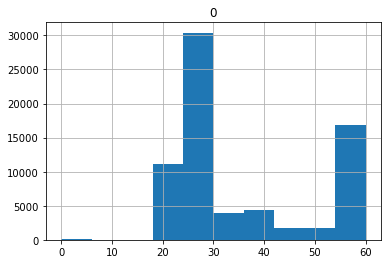

In [105]:
pd.DataFrame(predTest).hist()

In [97]:
pd.DataFrame(predTest).value_counts()

25.000    17276
20.000    12137
60.000     9323
40.000     7338
30.000     6240
35.000     6150
45.000     5056
50.000     4049
55.000     2565
0.000        44
dtype: int64

In [214]:
RMSE=mean_squared_error(y_test,predTest, squared=False)
MAPE=mean_absolute_percentage_error(y_test,predTest)
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 2.559923342133535 MAPE 0.039615911711427754


### LGBM Regresor

In [100]:
#from lightgbm import LGBMRegressor
import lightgbm as lgbm
from lightgbm import LGBMClassifier

In [101]:
modelLgbm=LGBMClassifier(n_estimators=500, learning_rate=0.01, reg_alpha=1, reg_lambda=3, objective ='multiclass', verbose=1)

In [40]:
"""
modelLgbm=lgbm.LGBMRegressor(boosting_type='gbdt', objective='regression', num_leaves=100,
                                learning_rate=0.01, n_estimators=500, max_depth=100,
                                metric='rmse', bagging_fraction=0.8, feature_fraction=1, reg_lambda=0)"""

In [102]:
modelLgbm.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 163746, number of used features: 7
[LightGBM] [Info] Start training from score -4.829053
[LightGBM] [Info] Start training from score -2.100087
[LightGBM] [Info] Start training from score -1.907182
[LightGBM] [Info] Start training from score -2.187761
[LightGBM] [Info] Start training from score -2.204174
[LightGBM] [Info] Start training from score -2.160637
[LightGBM] [Info] Start training from score -2.288793
[LightGBM] [Info] Start training from score -2.412171
[LightGBM] [Info] Start training from score -2.622703
[LightGBM] [Info] Start training from score -2.122889
[1]	training's multi_logloss: 2.1964	valid_1's multi_logloss: 2.19551
Training until validation scores don't improve for 5 rounds
[2]	training's multi_logloss: 2.18444	

[105]	training's multi_logloss: 1.87539	valid_1's multi_logloss: 1.87931
[106]	training's multi_logloss: 1.87461	valid_1's multi_logloss: 1.87857
[107]	training's multi_logloss: 1.87383	valid_1's multi_logloss: 1.87786
[108]	training's multi_logloss: 1.87305	valid_1's multi_logloss: 1.87714
[109]	training's multi_logloss: 1.87231	valid_1's multi_logloss: 1.87646
[110]	training's multi_logloss: 1.87157	valid_1's multi_logloss: 1.87578
[111]	training's multi_logloss: 1.87083	valid_1's multi_logloss: 1.87511
[112]	training's multi_logloss: 1.87011	valid_1's multi_logloss: 1.87445
[113]	training's multi_logloss: 1.86939	valid_1's multi_logloss: 1.8738
[114]	training's multi_logloss: 1.86871	valid_1's multi_logloss: 1.87318
[115]	training's multi_logloss: 1.86802	valid_1's multi_logloss: 1.87256
[116]	training's multi_logloss: 1.86732	valid_1's multi_logloss: 1.87193
[117]	training's multi_logloss: 1.86666	valid_1's multi_logloss: 1.87132
[118]	training's multi_logloss: 1.866	valid_1's mult

[219]	training's multi_logloss: 1.82983	valid_1's multi_logloss: 1.84198
[220]	training's multi_logloss: 1.82964	valid_1's multi_logloss: 1.84186
[221]	training's multi_logloss: 1.82945	valid_1's multi_logloss: 1.84176
[222]	training's multi_logloss: 1.82926	valid_1's multi_logloss: 1.84165
[223]	training's multi_logloss: 1.82906	valid_1's multi_logloss: 1.84154
[224]	training's multi_logloss: 1.82887	valid_1's multi_logloss: 1.84142
[225]	training's multi_logloss: 1.82869	valid_1's multi_logloss: 1.84134
[226]	training's multi_logloss: 1.8285	valid_1's multi_logloss: 1.84123
[227]	training's multi_logloss: 1.82831	valid_1's multi_logloss: 1.84113
[228]	training's multi_logloss: 1.82813	valid_1's multi_logloss: 1.84103
[229]	training's multi_logloss: 1.82794	valid_1's multi_logloss: 1.84093
[230]	training's multi_logloss: 1.82776	valid_1's multi_logloss: 1.84084
[231]	training's multi_logloss: 1.82758	valid_1's multi_logloss: 1.84074
[232]	training's multi_logloss: 1.82741	valid_1's mu

[332]	training's multi_logloss: 1.81419	valid_1's multi_logloss: 1.83602
[333]	training's multi_logloss: 1.81409	valid_1's multi_logloss: 1.836
[334]	training's multi_logloss: 1.81398	valid_1's multi_logloss: 1.83598
[335]	training's multi_logloss: 1.81388	valid_1's multi_logloss: 1.83595
[336]	training's multi_logloss: 1.81377	valid_1's multi_logloss: 1.83593
[337]	training's multi_logloss: 1.81366	valid_1's multi_logloss: 1.83591
[338]	training's multi_logloss: 1.81357	valid_1's multi_logloss: 1.8359
[339]	training's multi_logloss: 1.81347	valid_1's multi_logloss: 1.83588
[340]	training's multi_logloss: 1.81337	valid_1's multi_logloss: 1.83586
[341]	training's multi_logloss: 1.81326	valid_1's multi_logloss: 1.83584
[342]	training's multi_logloss: 1.81317	valid_1's multi_logloss: 1.83582
[343]	training's multi_logloss: 1.81307	valid_1's multi_logloss: 1.8358
[344]	training's multi_logloss: 1.81295	valid_1's multi_logloss: 1.83577
[345]	training's multi_logloss: 1.81285	valid_1's multi

[446]	training's multi_logloss: 1.8037	valid_1's multi_logloss: 1.83481
[447]	training's multi_logloss: 1.80361	valid_1's multi_logloss: 1.8348
[448]	training's multi_logloss: 1.80353	valid_1's multi_logloss: 1.8348
[449]	training's multi_logloss: 1.80345	valid_1's multi_logloss: 1.8348
[450]	training's multi_logloss: 1.80336	valid_1's multi_logloss: 1.83478
[451]	training's multi_logloss: 1.80327	valid_1's multi_logloss: 1.83477
[452]	training's multi_logloss: 1.80319	valid_1's multi_logloss: 1.83476
[453]	training's multi_logloss: 1.80311	valid_1's multi_logloss: 1.83476
[454]	training's multi_logloss: 1.80303	valid_1's multi_logloss: 1.83476
[455]	training's multi_logloss: 1.80294	valid_1's multi_logloss: 1.83475
[456]	training's multi_logloss: 1.80287	valid_1's multi_logloss: 1.83475
[457]	training's multi_logloss: 1.80278	valid_1's multi_logloss: 1.83473
[458]	training's multi_logloss: 1.8027	valid_1's multi_logloss: 1.83473
[459]	training's multi_logloss: 1.80261	valid_1's multi_

LGBMClassifier(learning_rate=0.01, n_estimators=500, objective='multiclass',
               reg_alpha=1, reg_lambda=3, verbose=1)

In [103]:
predTest= modelLgbm.predict(X_test)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

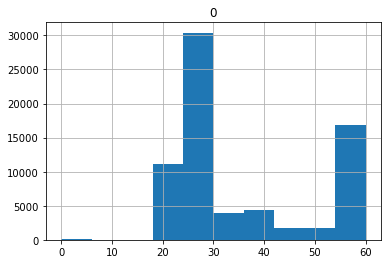

In [104]:
pd.DataFrame(predTest).hist()

In [107]:
RMSE=mean_squared_error(y_test,predTest, squared=False)
MAPE=mean_absolute_percentage_error(y_test,predTest)
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 16.86657190078824 MAPE 977048424388210.0


In [106]:
dump(modelLgbm,'modeloPred_edad_from_consumoV3.pkl')

['modeloPred_edad_from_consumoV3.pkl']

### Genero

In [234]:
len(dfFinal)

233924

In [236]:
dfFinal['Gen'].value_counts()

a    91715
M    71915
H    70294
Name: Gen, dtype: int64

In [109]:
dfFinalGen=dfFinal[dfFinal['Gen']!='a']

In [112]:
dfFinalGen['Gen'].value_counts()

1    71915
0    70294
Name: Gen, dtype: int64

In [110]:
dfFinalGen['Gen']=np.where(dfFinalGen['Gen']=='M',1,0)

<ipython-input-110-20ea021ed097>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFinalGen['Gen']=np.where(dfFinalGen['Gen']=='M',1,0)


In [111]:
len(dfFinalGen)

142209

In [293]:
import seaborn as sns

[17:03:28] ======== Monitor: Learner ========
[17:03:28] ======== Monitor: GBTree ========
[17:03:28] ======== Monitor: TreePruner ========


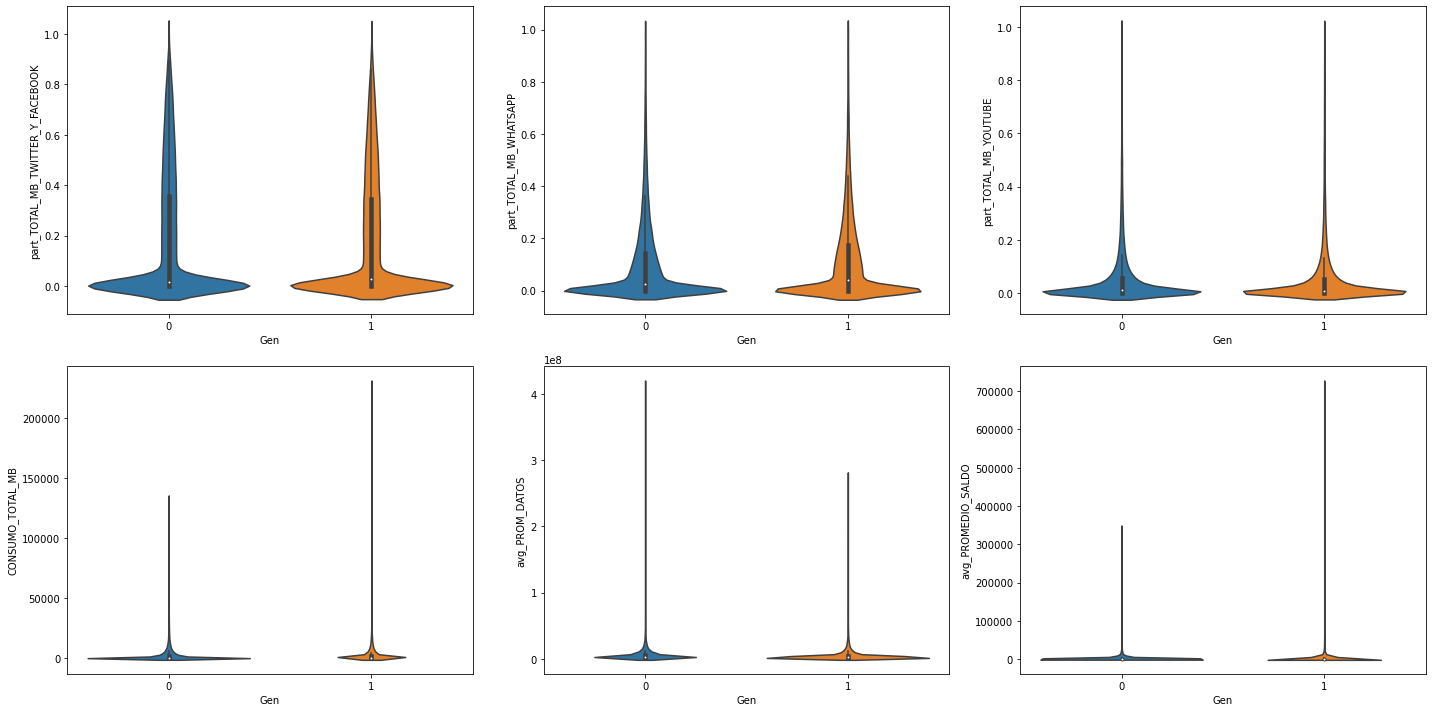

In [300]:
fig, ax = plt.subplots(2, 3, figsize=(20,10))
sns.violinplot(x="Gen", y="part_TOTAL_MB_TWITTER_Y_FACEBOOK", data=dfFinalGen, ax=ax[0,0])
sns.violinplot(x="Gen", y="part_TOTAL_MB_WHATSAPP", data=dfFinalGen, ax=ax[0,1])
sns.violinplot(x="Gen", y="part_TOTAL_MB_YOUTUBE", data=dfFinalGen, ax=ax[0,2])
sns.violinplot(x="Gen", y="CONSUMO_TOTAL_MB", data=dfFinalGen, ax=ax[1,0])
sns.violinplot(x="Gen", y="avg_PROM_DATOS", data=dfFinalGen, ax=ax[1,1,])
sns.violinplot(x="Gen", y="avg_PROMEDIO_SALDO", data=dfFinalGen, ax=ax[1,2])
fig.tight_layout()

## Modelos de género
* No clasifica correctamente con los datos utilizados

In [113]:
#Xvar=dfFinalGen.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS','res_avg_PROMEDIO_SALDO'])
Xvar=dfFinalGen.drop(columns = ['Gen','catEdad','res_avg_PROM_DATOS','res_avg_PROMEDIO_SALDO'])
yvar=dfFinalGen['Gen']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(Xvar, yvar, test_size = 0.3, random_state = 86, shuffle= True)

In [115]:
y_train.value_counts()

1    50277
0    49269
Name: Gen, dtype: int64

In [116]:
modelClass=LGBMClassifier(n_estimators=1000, learning_rate=0.01, reg_alpha=3, reg_lambda=3, objective ='binary')
modelClass.fit(X_train, y_train, eval_set =[(X_test,y_test)] , eval_metric=['auc'],verbose = 2) # ajustamos los datos de entrenamiento
# early_stopping_rounds=10

[2]	valid_0's auc: 0.568301	valid_0's binary_logloss: 0.692737
[4]	valid_0's auc: 0.56806	valid_0's binary_logloss: 0.692434
[6]	valid_0's auc: 0.568362	valid_0's binary_logloss: 0.692141
[8]	valid_0's auc: 0.569878	valid_0's binary_logloss: 0.691861
[10]	valid_0's auc: 0.570546	valid_0's binary_logloss: 0.691595
[12]	valid_0's auc: 0.571224	valid_0's binary_logloss: 0.691339
[14]	valid_0's auc: 0.571392	valid_0's binary_logloss: 0.691089
[16]	valid_0's auc: 0.57147	valid_0's binary_logloss: 0.690848
[18]	valid_0's auc: 0.571931	valid_0's binary_logloss: 0.690621
[20]	valid_0's auc: 0.572339	valid_0's binary_logloss: 0.690399
[22]	valid_0's auc: 0.572578	valid_0's binary_logloss: 0.690183
[24]	valid_0's auc: 0.572749	valid_0's binary_logloss: 0.689979
[26]	valid_0's auc: 0.572902	valid_0's binary_logloss: 0.689778
[28]	valid_0's auc: 0.572948	valid_0's binary_logloss: 0.689587
[30]	valid_0's auc: 0.573171	valid_0's binary_logloss: 0.689399
[32]	valid_0's auc: 0.573386	valid_0's binary_

[290]	valid_0's auc: 0.581354	valid_0's binary_logloss: 0.682585
[292]	valid_0's auc: 0.581397	valid_0's binary_logloss: 0.682572
[294]	valid_0's auc: 0.581413	valid_0's binary_logloss: 0.682559
[296]	valid_0's auc: 0.581464	valid_0's binary_logloss: 0.68254
[298]	valid_0's auc: 0.581466	valid_0's binary_logloss: 0.682532
[300]	valid_0's auc: 0.581509	valid_0's binary_logloss: 0.682517
[302]	valid_0's auc: 0.581517	valid_0's binary_logloss: 0.682512
[304]	valid_0's auc: 0.581529	valid_0's binary_logloss: 0.682502
[306]	valid_0's auc: 0.581509	valid_0's binary_logloss: 0.682497
[308]	valid_0's auc: 0.581555	valid_0's binary_logloss: 0.682485
[310]	valid_0's auc: 0.58159	valid_0's binary_logloss: 0.682472
[312]	valid_0's auc: 0.58158	valid_0's binary_logloss: 0.682465
[314]	valid_0's auc: 0.581597	valid_0's binary_logloss: 0.682457
[316]	valid_0's auc: 0.581633	valid_0's binary_logloss: 0.68245
[318]	valid_0's auc: 0.581668	valid_0's binary_logloss: 0.682437
[320]	valid_0's auc: 0.58169	

[546]	valid_0's auc: 0.582737	valid_0's binary_logloss: 0.681933
[548]	valid_0's auc: 0.582739	valid_0's binary_logloss: 0.681931
[550]	valid_0's auc: 0.582746	valid_0's binary_logloss: 0.68193
[552]	valid_0's auc: 0.58278	valid_0's binary_logloss: 0.681924
[554]	valid_0's auc: 0.582789	valid_0's binary_logloss: 0.681922
[556]	valid_0's auc: 0.582784	valid_0's binary_logloss: 0.681924
[558]	valid_0's auc: 0.582795	valid_0's binary_logloss: 0.681921
[560]	valid_0's auc: 0.582801	valid_0's binary_logloss: 0.68192
[562]	valid_0's auc: 0.582798	valid_0's binary_logloss: 0.681921
[564]	valid_0's auc: 0.582801	valid_0's binary_logloss: 0.681918
[566]	valid_0's auc: 0.582809	valid_0's binary_logloss: 0.681913
[568]	valid_0's auc: 0.582828	valid_0's binary_logloss: 0.68191
[570]	valid_0's auc: 0.582821	valid_0's binary_logloss: 0.68191
[572]	valid_0's auc: 0.582831	valid_0's binary_logloss: 0.681906
[574]	valid_0's auc: 0.582834	valid_0's binary_logloss: 0.681906
[576]	valid_0's auc: 0.582843	

[820]	valid_0's auc: 0.583269	valid_0's binary_logloss: 0.681783
[822]	valid_0's auc: 0.583265	valid_0's binary_logloss: 0.681782
[824]	valid_0's auc: 0.583263	valid_0's binary_logloss: 0.681785
[826]	valid_0's auc: 0.58326	valid_0's binary_logloss: 0.681786
[828]	valid_0's auc: 0.583263	valid_0's binary_logloss: 0.681787
[830]	valid_0's auc: 0.583261	valid_0's binary_logloss: 0.681788
[832]	valid_0's auc: 0.583254	valid_0's binary_logloss: 0.681792
[834]	valid_0's auc: 0.58324	valid_0's binary_logloss: 0.681796
[836]	valid_0's auc: 0.583244	valid_0's binary_logloss: 0.681796
[838]	valid_0's auc: 0.583234	valid_0's binary_logloss: 0.681799
[840]	valid_0's auc: 0.583224	valid_0's binary_logloss: 0.681803
[842]	valid_0's auc: 0.583222	valid_0's binary_logloss: 0.681806
[844]	valid_0's auc: 0.583212	valid_0's binary_logloss: 0.681809
[846]	valid_0's auc: 0.583205	valid_0's binary_logloss: 0.68181
[848]	valid_0's auc: 0.583201	valid_0's binary_logloss: 0.681813
[850]	valid_0's auc: 0.58319

LGBMClassifier(learning_rate=0.01, n_estimators=1000, objective='binary',
               reg_alpha=3, reg_lambda=3)

In [284]:
predTestClass= modelClass.predict(X_test)

In [285]:
X_test.head(5)

part_TOTAL_MB_INSTAGRAM  part_TOTAL_MB_TWITTER_Y_FACEBOOK  \
8316                      0.000                             0.073   
187365                    0.000                             0.000   
2914                      0.000                             0.010   
27626                     0.000                             0.000   
231020                    0.000                             0.270   

        part_TOTAL_MB_WHATSAPP  part_TOTAL_MB_YOUTUBE  CONSUMO_TOTAL_MB  \
8316                     0.083                  0.527           628.000   
187365                   0.000                  0.000            -1.000   
2914                     0.237                  0.341          1348.000   
27626                    0.000                  0.000            -1.000   
231020                   0.176                  0.063           904.000   

        avg_PROM_DATOS  avg_PROMEDIO_SALDO  
8316       1383540.638               1.830  
187365     6509657.497               0.000  
2914       2767611.477               0.100  
27626       505445.207              38.880  
231020     5388667.406             258.065

In [286]:
predTestClass

array([1, 0, 0, ..., 1, 1, 0])

In [287]:
# logistic regresion
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

In [288]:
model_lg = LogisticRegression(C=1, solver="liblinear")
model_lg.fit(X_train, y_train)

LogisticRegression(C=1, solver='liblinear')

In [289]:
predLG = model_lg.predict(X_test)
predLG

array([0, 1, 0, ..., 1, 1, 1])

In [290]:
#y_test

In [291]:
print("F1 score: ", f1_score(y_test, predLG))
print("Accuracy: ", accuracy_score(y_test, predLG) * 100)

F1 score:  0.5490849305585602
Accuracy:  51.14267632374657


### Aplicar el modelo a la base completa

In [350]:
dfBC = pd.read_csv(f'tabla1_TotalV4.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (1,32,35,95) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [351]:
len(dfBC)

8262131

In [352]:
dfBC.isnull().sum()

CO_ID                                     0
IDENTIFICACION                            0
POROUT                                    0
TOTAL_MB_WHATSAPP                         0
TOTAL_MB_TWITTER_Y_FACEBOOK               0
TOTAL_MB_SNAPCHAT                         0
TOTAL_MB_INSTAGRAM                        0
TOTAL_MB_YOUTUBE                          0
TOTAL_MB_GOOGLE_MAPS                      0
CONSUMO_TOTAL_MB                          0
ANTIGUEDAD_USUARIO                  5044299
TOTAL_VALOR_DE_ADELANTA_SALDO       5688616
ES_SMARTPHONE                       4981607
tipo_id                                   0
ACTIGUEDAD_ACT_BSCS                       0
avg_PROM_SEGUNDOS                   3683735
STD_PROM_SEGUNDOS                   4457634
STD_cat_PROM_SEGUNDOS               4457654
STD_cat2_PROM_SEGUNDOS              4457654
slope_PROM_SEGUNDOS                 4457634
slope_cat_PROM_SEGUNDOS             4457654
slope_cat2_PROM_SEGUNDOS            4457654
avg_PROM_DATOS                  

### Seleccionar con información del consumo

In [353]:
varPq=['paq_youtube', 'paq_ws', 'paq_waze', 'paq_twitter','paq_snapchat',
        'paq_sms','paq_Instagram','paq_minutos','paq_datos']
varCon=['CONSUMO_TOTAL_MB','TOTAL_MB_YOUTUBE','TOTAL_MB_WHATSAPP','TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT',
        'TOTAL_MB_INSTAGRAM','TOTAL_MB_GOOGLE_MAPS']

In [354]:
dfBC['selConsumo']=dfBC[varCon].max(axis=1)

In [355]:
dfBC['selConsumo2']=np.where(dfBC['selConsumo']<=5,dfBC['selConsumo'],'>10')

In [356]:
dfBC['selConsumo2'].value_counts()

-1.0    5959033
>10     1812771
0.0      369032
1.0       47714
2.0       26398
3.0       19669
4.0       15156
5.0       12358
Name: selConsumo2, dtype: int64

In [357]:
ResumenTotalPO=dfBC[['selConsumo2','POROUT']].groupby('selConsumo2').agg(['sum','count'])

In [358]:
ResumenTotalPO.columns = ResumenTotalPO.columns.droplevel()

In [359]:
ResumenTotalPO

sum    count
selConsumo2                 
-1.0          61628  5959033
0.0           21315   369032
1.0            3192    47714
2.0            1839    26398
3.0            1531    19669
4.0            1131    15156
5.0             897    12358
>10          213224  1812771

In [360]:
ResumenTotalPO['sum'].sum()

304757

In [361]:
ResumenTotalPO['count'].sum()

8262131

In [362]:
ResumenTotalPO['sum'].sum()/ResumenTotalPO['count'].sum()

0.036886004349241136

In [363]:
ResumenTotalPO['indicePorout']=ResumenTotalPO['sum']/ResumenTotalPO['count']

In [364]:
## seleccionar datos con imformación de consumo

In [365]:
dfBC=dfBC[dfBC['selConsumo']>0]

In [366]:
len(dfBC)

1934066

In [367]:
dfBC['POROUT'].sum()

221814

In [368]:
dfBC['POROUT'].sum()/len(dfBC)

0.11468791654473012

In [369]:
#### Graficar indice de porout

### Calcular la Edad de todas las observaciones con modelo predictivo

In [370]:
#Seleccionar columnas para algoritmo

In [374]:
colX=dfFinal.drop(columns = ['EDAD','Gen','catEdad','res_avg_PROM_DATOS','res_avg_PROMEDIO_SALDO']).columns

In [375]:
colX

Index(['part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_TWITTER_Y_FACEBOOK',
       'part_TOTAL_MB_WHATSAPP', 'part_TOTAL_MB_YOUTUBE', 'CONSUMO_TOTAL_MB',
       'avg_PROM_DATOS', 'avg_PROMEDIO_SALDO'],
      dtype='object')

In [376]:
X_input=dfBC[colX]

In [485]:
edad_pred= modelLgbm.predict(X_input)

In [486]:
dfBC['Edad_pred']=edad_pred

In [487]:
dfBC.sample(10)

CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
6378140  345600214  901002589.000       0           1157.000   
6892522  348252836 9000174478.000       0             35.000   
7722304  310356956      900206408       0            369.000   
2433234  307593807  807009143.000       0            106.000   
821391   245760176  830513238.000       0           1188.000   
7673532  237479664    900048678.0       0            216.000   
6039710  343794683  901002589.000       0             99.000   
2448587  307975001  900613968.000       0              0.000   
877743   248685175   90801837.000       0           1855.000   
7580883  324727511    900673280.0       0             27.000   

         TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
6378140                     2734.000              2.000               0.000   
6892522                      160.000              2.000              13.000   
7722304                        6.000              0.000              30.000   
2433234                      378.000              0.000               0.000   
821391                      1474.000              1.000               8.000   
7673532                      619.000              0.000               3.000   
6039710                     1640.000            126.000               1.000   
2448587                       33.000              0.000               0.000   
877743                      5379.000              1.000            3282.000   
7580883                        1.000              0.000               0.000   

         TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
6378140          1774.000                 0.000          6271.000   
6892522             7.000                 0.000           814.000   
7722304             2.000                 0.000           618.000   
2433234             2.000                 0.000           731.000   
821391            559.000                 0.000          6266.000   
7673532            19.000                 0.000           895.000   
6039710           210.000                 0.000          3014.000   
2448587             3.000                 0.000            46.000   
877743            923.000                 0.000         14515.000   
7580883             3.000                 0.000            55.000   

         ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
6378140              55.000                          0.000          1.000   
6892522               3.000                          0.000          1.000   
7722304             361.000                          0.000          1.000   
2433234             430.000                          0.000          1.000   
821391             1340.000                          0.000          1.000   
7673532            1465.000                          0.000          1.000   
6039710              69.000                            NaN          1.000   
2448587             433.000                          0.000          1.000   
877743             1261.000                          0.000          1.000   
7580883             294.000                          0.000          1.000   

        tipo_id  ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
6378140     NIT                  101            146.628            148.123   
6892522     NIT                   64             68.000                NaN   
7722304     NIT                  499             77.476             41.011   
2433234     NIT                  529            216.098             23.928   
821391      NIT                 1345            431.354             69.260   
7673532     NIT                 1474            126.238             49.936   
6039710     NIT                  124            365.872            254.398   
2448587     NIT                  527            205.378             52.098   
877743   cedula                 1298             46.424             14.034   
7580883     NIT                  320              

### Agregar Edades previamente identificadas
* Edades utilizadas para entrenar el modelo y se usaron de base.

In [492]:
df1[['CO_ID','EDAD']].head()

CO_ID   EDAD
0  7045723 43.432
1  7153200 54.792
2  7166147 61.881
3  7236526 42.822
4  7360814 49.735

In [489]:
df1['selContID'].value_counts()

val    233926
Name: selContID, dtype: int64

In [500]:
df1[df1['EDAD'].isnull()]

Unnamed: 0      CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
300361      300361  258121849       VALBUENA       1              0.000   
311585      311585  261035085       BUITRAGO       1            810.000   

        TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
300361                        0.000              0.000               0.000   
311585                     1401.000             36.000              33.000   

        TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
300361             0.000                 0.000             0.000   
311585            92.000                 0.000          4620.000   

        CANT_PAQ_MAS_COMPRADO_MES  VLR_PAQ_MAS_COMPRADO_MES  \
300361                      0.000                     0.000   
311585                      0.000                     0.000   

        ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
300361            1110.000                            NaN          1.000   
311585            1080.000                          0.000          1.000   

        CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
300361                               0.000                              0.000   
311585                               0.000                              0.000   

        ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
300361                 1163            176.510            101.279   
311585                 1118            307.029            118.761   

        STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
300361                  0.574              dispersed              -27.092   
311585                  0.387               moderate              -40.362   

        slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
300361                   -0.153                 decrease     1500510.817   
311585                   -0.131                 decrease     5871164.422   

        STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  \
300361     2961225.852               1.973           dispersed   
311585     1279883.608               0.218              united   

        slope_PROM_DATOS  slope_cat_PROM_DATOS slope_cat2_PROM_DATOS  \
300361      -1788571.785                -1.192              decrease   
311585       -147473.445                -0.025               noTrend   

        avg_PROMEDIO_SALDO  STD_PROMEDIO_SALDO  STD_cat_PROMEDIO_SALDO  \
300361               1.200                 NaN                     NaN   
311585              24.511              40.735                   1.662   

       STD_cat2_PROMEDIO_SALDO  slope_PROMEDIO_SALDO  \
300361                     NaN                   NaN   
311585               dispersed                 1.000   

        slope_cat_PROMEDIO_SALDO slope_cat2_PROMEDIO_SALDO  paq_datos  \
300361                       NaN                       NaN          0   
311585                     0.041                   noTrend          0   

        paq_empresas  paq_facebook  paq_Instagram  paq_LargaDistancia  \
300361             0             0              0                   0   
311585             0             0              0                   0   

        paq_migracion  paq_minutos  paq_pasatiempo  paq_sinpaquete  paq_sms  \
300361              0            0               0               1        0   
311585              0            0               0               1        0   

        paq_snapchat  paq_speedy  paq_suscripcion  paq_todoIncluido  \
300361             0           0                0                 0   
311585             0           0                0                 0   

        paq_twitter  paq_waze  paq_ws  paq_wtf  paq_youtube  paq_datos_v  \
300361            0         0       0        0            0        0.000   
311585            0         0       0        0            0        0.000   

        paq_datos_q  paq_empresas_v  paq_empresas_q  paq_facebook_v  \
300361    

In [501]:
dfBCV2=dfBC.merge(df1[df1['EDAD'].notnull()][['CO_ID','EDAD']],left_on='CO_ID' , right_on='CO_ID')

In [502]:
dfBCV2.sample(5)

CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
31077   263240782   20504309.000       1              2.000   
68742   328151829   18143922.000       1            105.000   
100836   98434381     89008709.0       0            298.000   
88940   347892464   40031478.000       1            930.000   
15839   205481566    7204202.000       1             23.000   

        TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
31077                         1.000              0.000               0.000   
68742                       107.000              8.000               0.000   
100836                     1185.000              7.000               0.000   
88940                      1573.000              3.000              11.000   
15839                        41.000              0.000               0.000   

        TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
31077              7.000                 0.000            24.000   
68742            163.000                 0.000          1681.000   
100836            68.000                 0.000          1770.000   
88940             77.000                 0.000          4343.000   
15839            134.000                 0.000          2287.000   

        ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
31077             1059.000                          0.000          1.000   
68742                  NaN                          0.000          1.000   
100836            3635.000                          0.000          1.000   
88940                  NaN                          0.000          1.000   
15839             2163.000                          0.000          1.000   

       tipo_id  ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
31077   cedula                 1090            337.958             47.072   
68742   cedula                  283            299.859             94.333   
100836  cedula                 3697            295.003             13.138   
88940   cedula                   69            389.071            105.190   
15839   cedula                 2200            147.273             59.539   

        STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
31077                   0.139                 united              -23.783   
68742                   0.315               moderate               63.331   
100836                  0.045                 united               -2.778   
88940                   0.270               moderate               50.890   
15839                   0.404               moderate               -2.653   

        slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
31077                    -0.070                  noTrend       34652.908   
68742                     0.211                 increase     1207467.495   
100836                   -0.009                  noTrend     4254064.108   
88940                     0.131                 increase    20068240.539   
15839                    -0.018                  noTrend     2965644.983   

        STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  \
31077        35151.024               1.014            moderate   
68742      1131354.969               0.937            moderate   
100836     1179575.472               0.277              united   
88940      6555612.432               0.327              united   
15839      3864479.545               1.303           dispersed   

        slope_PROM_DATOS  slope_cat_PROM_DATOS slope_cat2_PROM_DATOS  \
31077          16568.079                 0.478              increase   
68742         282927.114                 0.234              increase   
100836        191014.073                 0.045               noTrend   
88940       -1370679.786                -0.068               noTrend   
15839        2071317.487                 0.698              increase   

        avg_PROMEDIO_SALDO  STD_PROMEDIO_SALDO  STD_cat_PROMEDIO_SALDO  \
31077      

In [503]:
len(dfBCV2)

154777

In [505]:
#dfBCV2.isnull().sum()

In [506]:
RMSE=mean_squared_error(dfBCV2['EDAD'],dfBCV2['Edad_pred'], squared=False)
MAPE=mean_absolute_percentage_error(dfBCV2['EDAD'],dfBCV2['Edad_pred'])
print("RMSE",RMSE,"MAPE",MAPE)

RMSE 13.151541088235536 MAPE 0.30384299824006117


In [507]:
dfBCV3=dfBC.merge(df1[df1['EDAD'].notnull()][['CO_ID','EDAD']],left_on='CO_ID' , right_on='CO_ID',how='left')

In [508]:
len(dfBCV3)

1934066

In [509]:
dfBCV3.head()

CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
0  6891437          1.000       0              0.000   
1  7236526   52427533.000       1              1.000   
2  7360991   63449651.000       1             17.000   
3  7407412   31867209.000       1            469.000   
4  8060686   66953389.000       0            428.000   

   TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
0                        0.000              0.000               0.000   
1                        0.000              0.000               0.000   
2                        0.000              0.000               0.000   
3                      726.000              1.000               0.000   
4                     1324.000              2.000             884.000   

   TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
0             0.000                 0.000             4.000   
1             0.000                 0.000             3.000   
2             0.000                 0.000            22.000   
3           260.000                 0.000          2054.000   
4           111.000                 0.000          6199.000   

   ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE tipo_id  \
0                 NaN                            NaN          1.000  sin id   
1            6524.000                          0.000          1.000  cedula   
2            6576.000                          0.000          1.000  cedula   
3            6539.000                          0.000          1.000  cedula   
4            6452.000                          0.000          1.000  cedula   

   ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
0                 6617            610.427            309.423   
1                 6585            411.850            195.618   
2                 6576           1427.303            301.336   
3                 6570            247.855             87.984   
4                 6483            556.876            127.769   

   STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
0                  0.507              dispersed             -130.925   
1                  0.475               moderate             -120.375   
2                  0.211                 united              -27.008   
3                  0.355               moderate               15.948   
4                  0.229                 united               91.491   

   slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
0                   -0.214                 decrease       35690.556   
1                   -0.292                 decrease      381114.714   
2                   -0.019                  noTrend      276137.588   
3                    0.064                  noTrend     4739278.597   
4                    0.164                 increase    10951550.812   

   STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  slope_PROM_DATOS  \
0        4792.037               0.134              united          4678.754   
1             NaN                 NaN                 NaN               NaN   
2      242368.665               0.878            moderate        -71207.533   
3     2986349.923               0.630            moderate       2070439.146   
4     4597563.772               0.420              united       3163003.871   

   slope_cat_PROM_DATOS slope_cat2_PROM_DATOS  avg_PROMEDIO_SALDO  \
0                 0.131              increase               0.000   
1                   NaN                   NaN               0.000   
2                -0.258              decrease            2835.703   
3                 0.437              increase               4.170   
4                 0.289              increase            2820.134   

   STD_PROMEDIO_SALDO  STD_cat_PROMEDIO_SALDO STD_cat2_PROMEDIO_SALDO  \
0               0.000                     NaN                     NaN   
1                 NaN                     NaN                     NaN   
2            3370.562

In [510]:
dfBCV3['EDAD']=np.where(dfBCV3['EDAD'].isnull(),dfBCV3['Edad_pred'],dfBCV3['EDAD'])

In [511]:
dfBCV3.to_csv('BaseArboles_conEdad.csv')

### Recortes

In [311]:
del dfcp5
del dfcp4
gc.collect()

NameError: name 'dfcp5' is not defined

In [301]:
dfcp5 = pd.read_csv(f'tabla1_cp5.csv')
dfcp4 = pd.read_csv(f'tabla1_cp5.csv')

C:\ProgramData\Anaconda3\envs\ds_sqdm_claro\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [305]:
print(len(dfcp5),len(dfcp4))

848321 848321


In [307]:
print(len(dfcp5.columns),len(dfcp4.columns))

121 121


In [308]:
dfcp5.head()

Unnamed: 0    CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
0           0  7045723   41939455.000       0             -1.000   
1           1  7153200   51832393.000       1             -1.000   
2           2  7166147   19383515.000       1            271.000   
3           3  7236526   52427533.000       1              1.000   
4           4  7360814   79556158.000       1              0.000   

   TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
0                       -1.000             -1.000              -1.000   
1                       -1.000             -1.000              -1.000   
2                       69.000              0.000             149.000   
3                        0.000              0.000               0.000   
4                        0.000              0.000               0.000   

   TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
0            -1.000                -1.000            -1.000   
1            -1.000                -1.000            -1.000   
2            42.000                 0.000           850.000   
3             0.000                 0.000             3.000   
4             0.000                 0.000             0.000   

   CANT_PAQ_MAS_COMPRADO_MES  VLR_PAQ_MAS_COMPRADO_MES  ANTIGUEDAD_USUARIO  \
0                      0.000                     0.000                 NaN   
1                      0.000                     0.000                 NaN   
2                      3.000                 -6000.000            6560.000   
3                      0.000                     0.000            6524.000   
4                      0.000                     0.000            6576.000   

   TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
0                            NaN            NaN   
1                            NaN            NaN   
2                          0.000          1.000   
3                          0.000          1.000   
4                          0.000          1.000   

   CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
0                               0.000                              0.000   
1                               0.000                              0.000   
2                               2.000                          -3000.000   
3                               0.000                              0.000   
4                               2.000                          -4000.000   

   ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
0                 6605                NaN                NaN   
1                 6591            231.667                NaN   
2                 6591            403.874            168.898   
3                 6585            411.850            195.618   
4                 6576            395.286             85.592   

   STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                  0.418              dispersed              109.164   
3                  0.475              dispersed             -120.375   
4                  0.217                 united               41.538   

   slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
0                      NaN                      NaN             NaN   
1                      NaN                      NaN     1205011.764   
2                    0.270                 increase      802897.989   
3                   -0.292                 decrease      381114.714   
4                    0.105                 increase     5436421.489   

   STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  slope_PROM_DATOS  \
0             NaN                 NaN                 NaN               NaN   
1     2389390.761               1.983           dispersed      -1428486.633   
2     1395627.707               1.738           dispersed    

In [309]:
dfcp4.head()

Unnamed: 0    CO_ID IDENTIFICACION  POROUT  TOTAL_MB_WHATSAPP  \
0           0  7045723   41939455.000       0             -1.000   
1           1  7153200   51832393.000       1             -1.000   
2           2  7166147   19383515.000       1            271.000   
3           3  7236526   52427533.000       1              1.000   
4           4  7360814   79556158.000       1              0.000   

   TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  TOTAL_MB_INSTAGRAM  \
0                       -1.000             -1.000              -1.000   
1                       -1.000             -1.000              -1.000   
2                       69.000              0.000             149.000   
3                        0.000              0.000               0.000   
4                        0.000              0.000               0.000   

   TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  CONSUMO_TOTAL_MB  \
0            -1.000                -1.000            -1.000   
1            -1.000                -1.000            -1.000   
2            42.000                 0.000           850.000   
3             0.000                 0.000             3.000   
4             0.000                 0.000             0.000   

   CANT_PAQ_MAS_COMPRADO_MES  VLR_PAQ_MAS_COMPRADO_MES  ANTIGUEDAD_USUARIO  \
0                      0.000                     0.000                 NaN   
1                      0.000                     0.000                 NaN   
2                      3.000                 -6000.000            6560.000   
3                      0.000                     0.000            6524.000   
4                      0.000                     0.000            6576.000   

   TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
0                            NaN            NaN   
1                            NaN            NaN   
2                          0.000          1.000   
3                          0.000          1.000   
4                          0.000          1.000   

   CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
0                               0.000                              0.000   
1                               0.000                              0.000   
2                               2.000                          -3000.000   
3                               0.000                              0.000   
4                               2.000                          -4000.000   

   ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
0                 6605                NaN                NaN   
1                 6591            231.667                NaN   
2                 6591            403.874            168.898   
3                 6585            411.850            195.618   
4                 6576            395.286             85.592   

   STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                  0.418              dispersed              109.164   
3                  0.475              dispersed             -120.375   
4                  0.217                 united               41.538   

   slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
0                      NaN                      NaN             NaN   
1                      NaN                      NaN     1205011.764   
2                    0.270                 increase      802897.989   
3                   -0.292                 decrease      381114.714   
4                    0.105                 increase     5436421.489   

   STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  slope_PROM_DATOS  \
0             NaN                 NaN                 NaN               NaN   
1     2389390.761               1.983           dispersed      -1428486.633   
2     1395627.707               1.738           dispersed    

### Trabajo con variables categoricas

In [14]:
varNumericas=['TOTAL_MB_WHATSAPP', 'TOTAL_MB_TWITTER_Y_FACEBOOK','TOTAL_MB_SNAPCHAT', 'TOTAL_MB_INSTAGRAM', 'TOTAL_MB_YOUTUBE',
       'TOTAL_MB_GOOGLE_MAPS', 'CONSUMO_TOTAL_MB','ANTIGUEDAD_USUARIO', 'TOTAL_VALOR_DE_ADELANTA_SALDO',
         'paq_datos_v', 'paq_datos_q', 'paq_empresas_v', 'paq_empresas_q',
       'paq_facebook_v', 'paq_facebook_q', 'paq_Instagram_v',
       'paq_Instagram_q', 'paq_LargaDistancia_v', 'paq_LargaDistancia_q',
       'paq_migracion_v', 'paq_migracion_q', 'paq_minutos_v',
       'paq_minutos_q', 'paq_pasatiempo_v', 'paq_pasatiempo_q',
       'paq_sinpaquete_v', 'paq_sinpaquete_q', 'paq_sms_v', 'paq_sms_q',
       'paq_snapchat_v', 'paq_snapchat_q', 'paq_speedy_v', 'paq_speedy_q',
       'paq_suscripcion_v', 'paq_suscripcion_q', 'paq_todoIncluido_v',
       'paq_todoIncluido_q', 'paq_twitter_v', 'paq_twitter_q',
       'paq_waze_v', 'paq_waze_q', 'paq_ws_v', 'paq_ws_q', 'paq_wtf_v',
       'paq_wtf_q', 'paq_youtube_v', 'paq_youtube_q','avg_PROM_SEGUNDOS','avg_PROM_DATOS','avg_PROMEDIO_SALDO',
        'part_TOTAL_MB_WHATSAPP',
       'part_TOTAL_MB_TWITTER_Y_FACEBOOK', 'part_TOTAL_MB_SNAPCHAT',
       'part_TOTAL_MB_INSTAGRAM', 'part_TOTAL_MB_YOUTUBE',
       'part_TOTAL_MB_GOOGLE_MAPS','EDAD']
varCategoricasOrdinales=['POROUT','ES_SMARTPHONE','razon_CANCELACION','razon_COBRO', 'razon_COMERCIAL',
       'razon_EQUIPO', 'razon_FACTURACION', 'razon_INFORMACION',
       'razon_PAGO']
varCategoricasNominales=['res_Region','Gen']

In [15]:
df['res_Region'].value_counts()

Centro          37705
NorOccidente    30209
Oriente         26732
Costa           24224
SurOccidente    23664
Name: res_Region, dtype: int64

In [16]:
df['Gen'].value_counts()

a    91715
M    71915
H    70294
Name: Gen, dtype: int64

In [17]:
#one_hot_data = pd.get_dummies(df[['res_Region','Gen']],drop_first=True)
one_hot_data = pd.get_dummies(df[['res_Region','Gen']])

In [18]:
one_hot_data.head(2)

res_Region_Centro  res_Region_Costa  res_Region_NorOccidente  \
0                  0                 0                        0   
1                  0                 0                        0   

   res_Region_Oriente  res_Region_SurOccidente  Gen_H  Gen_M  Gen_a  
0                   0                        0      0      1      0  
1                   0                        0      0      1      0

In [19]:
#tablaAnalisis['COMPORTAMIENTO_PAGO'].cat.reorder_categories([0,'ALTO RIESGO','REGULAR','BUENO','MUY BUENO'], inplace=True)

In [20]:
dfFinal=df.merge(one_hot_data, left_index=True, right_index=True)

In [21]:
dfFinal.head()

POROUT  TOTAL_MB_WHATSAPP  TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  \
0       0             -1.000                       -1.000             -1.000   
1       1             -1.000                       -1.000             -1.000   
2       1            271.000                       69.000              0.000   
3       1              1.000                        0.000              0.000   
4       1              0.000                        0.000              0.000   

   TOTAL_MB_INSTAGRAM  TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  \
0              -1.000            -1.000                -1.000   
1              -1.000            -1.000                -1.000   
2             149.000            42.000                 0.000   
3               0.000             0.000                 0.000   
4               0.000             0.000                 0.000   

   CONSUMO_TOTAL_MB  CANT_PAQ_MAS_COMPRADO_MES  VLR_PAQ_MAS_COMPRADO_MES  \
0            -1.000                      0.000                     0.000   
1            -1.000                      0.000                     0.000   
2           850.000                      3.000                 -6000.000   
3             3.000                      0.000                     0.000   
4             0.000                      0.000                     0.000   

   ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  ES_SMARTPHONE  \
0                 NaN                            NaN            NaN   
1                 NaN                            NaN            NaN   
2            6560.000                          0.000          1.000   
3            6524.000                          0.000          1.000   
4            6576.000                          0.000          1.000   

   CANT_PAQ_MAS_COMPRADO_MES_ANTERIOR  VLR_PAQ_MAS_COMPRADO_MES_ANTERIOR  \
0                               0.000                              0.000   
1                               0.000                              0.000   
2                               2.000                          -3000.000   
3                               0.000                              0.000   
4                               2.000                          -4000.000   

   ACTIGUEDAD_ACT_BSCS  avg_PROM_SEGUNDOS  STD_PROM_SEGUNDOS  \
0                 6605                NaN                NaN   
1                 6591            231.667                NaN   
2                 6591            403.874            168.898   
3                 6585            411.850            195.618   
4                 6576            395.286             85.592   

   STD_cat_PROM_SEGUNDOS STD_cat2_PROM_SEGUNDOS  slope_PROM_SEGUNDOS  \
0                    NaN                    NaN                  NaN   
1                    NaN                    NaN                  NaN   
2                  0.418              dispersed              109.164   
3                  0.475              dispersed             -120.375   
4                  0.217                 united               41.538   

   slope_cat_PROM_SEGUNDOS slope_cat2_PROM_SEGUNDOS  avg_PROM_DATOS  \
0                      NaN                      NaN             NaN   
1                      NaN                      NaN     1205011.764   
2                    0.270                 increase      802897.989   
3                   -0.292                 decrease      381114.714   
4                    0.105                 increase     5436421.489   

   STD_PROM_DATOS  STD_cat_PROM_DATOS STD_cat2_PROM_DATOS  slope_PROM_DATOS  \
0             NaN                 NaN                 NaN               NaN   
1     2389390.761               1.983           dispersed      -1428486.633   
2     1395627.707               1.738           dispersed        830992.691   
3             NaN                 NaN                 NaN               NaN   
4     9365348.847               1.723           dispersed        546769.880   

   slope_cat_PROM_DATOS slope_cat2_PROM_DATOS  avg_PROMEDIO_SALDO  \
0

In [22]:
len(dfFinal)

233926

In [23]:
dfFinal.drop(columns=['res_Region','Gen'],inplace=True)

In [24]:
dfFinal.reset_index(drop=True,inplace=True)

In [25]:
varNumericas+varCategoricasOrdinales+list(one_hot_data.columns)

['TOTAL_MB_WHATSAPP',
 'TOTAL_MB_TWITTER_Y_FACEBOOK',
 'TOTAL_MB_SNAPCHAT',
 'TOTAL_MB_INSTAGRAM',
 'TOTAL_MB_YOUTUBE',
 'TOTAL_MB_GOOGLE_MAPS',
 'CONSUMO_TOTAL_MB',
 'ANTIGUEDAD_USUARIO',
 'TOTAL_VALOR_DE_ADELANTA_SALDO',
 'paq_datos_v',
 'paq_datos_q',
 'paq_empresas_v',
 'paq_empresas_q',
 'paq_facebook_v',
 'paq_facebook_q',
 'paq_Instagram_v',
 'paq_Instagram_q',
 'paq_LargaDistancia_v',
 'paq_LargaDistancia_q',
 'paq_migracion_v',
 'paq_migracion_q',
 'paq_minutos_v',
 'paq_minutos_q',
 'paq_pasatiempo_v',
 'paq_pasatiempo_q',
 'paq_sinpaquete_v',
 'paq_sinpaquete_q',
 'paq_sms_v',
 'paq_sms_q',
 'paq_snapchat_v',
 'paq_snapchat_q',
 'paq_speedy_v',
 'paq_speedy_q',
 'paq_suscripcion_v',
 'paq_suscripcion_q',
 'paq_todoIncluido_v',
 'paq_todoIncluido_q',
 'paq_twitter_v',
 'paq_twitter_q',
 'paq_waze_v',
 'paq_waze_q',
 'paq_ws_v',
 'paq_ws_q',
 'paq_wtf_v',
 'paq_wtf_q',
 'paq_youtube_v',
 'paq_youtube_q',
 'avg_PROM_SEGUNDOS',
 'avg_PROM_DATOS',
 'avg_PROMEDIO_SALDO',
 'part_TO

In [26]:
dfFinal=dfFinal[varNumericas+varCategoricasOrdinales+list(one_hot_data.columns)]

In [27]:
dfFinal.head()

TOTAL_MB_WHATSAPP  TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  \
0             -1.000                       -1.000             -1.000   
1             -1.000                       -1.000             -1.000   
2            271.000                       69.000              0.000   
3              1.000                        0.000              0.000   
4              0.000                        0.000              0.000   

   TOTAL_MB_INSTAGRAM  TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  \
0              -1.000            -1.000                -1.000   
1              -1.000            -1.000                -1.000   
2             149.000            42.000                 0.000   
3               0.000             0.000                 0.000   
4               0.000             0.000                 0.000   

   CONSUMO_TOTAL_MB  ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  \
0            -1.000                 NaN                            NaN   
1            -1.000                 NaN                            NaN   
2           850.000            6560.000                          0.000   
3             3.000            6524.000                          0.000   
4             0.000            6576.000                          0.000   

   paq_datos_v  paq_datos_q  paq_empresas_v  paq_empresas_q  paq_facebook_v  \
0        0.000        0.000           0.000           0.000           0.000   
1        0.000        0.000           0.000           0.000           0.000   
2    -9000.000        5.000          -0.000           0.000       -9000.000   
3        0.000        0.000           0.000           0.000           0.000   
4    -4000.000        2.000          -0.000           0.000          -0.000   

   paq_facebook_q  paq_Instagram_v  paq_Instagram_q  paq_LargaDistancia_v  \
0           0.000            0.000            0.000                 0.000   
1           0.000            0.000            0.000                 0.000   
2           5.000           -0.000            0.000                -0.000   
3           0.000            0.000            0.000                 0.000   
4           0.000           -0.000            0.000                -0.000   

   paq_LargaDistancia_q  paq_migracion_v  paq_migracion_q  paq_minutos_v  \
0                 0.000            0.000            0.000          0.000   
1                 0.000            0.000            0.000          0.000   
2                 0.000           -0.000            0.000         -0.000   
3                 0.000            0.000            0.000          0.000   
4                 0.000           -0.000            0.000         -0.000   

   paq_minutos_q  paq_pasatiempo_v  paq_pasatiempo_q  paq_sinpaquete_v  \
0          0.000             0.000             0.000             0.000   
1          0.000             0.000             0.000             0.000   
2          0.000            -0.000             0.000            -0.000   
3          0.000             0.000             0.000             0.000   
4          0.000            -0.000             0.000         -4000.000   

   paq_sinpaquete_q  paq_sms_v  paq_sms_q  paq_snapchat_v  paq_snapchat_q  \
0             0.000      0.000      0.000           0.000           0.000   
1             0.000      0.000      0.000           0.000           0.000   
2             0.000     -0.000      0.000          -0.000           0.000   
3             0.000      0.000      0.000           0.000           0.000   
4             2.000     -0.000      0.000          -0.000           0.000   

   paq_speedy_v  paq_speedy_q  paq_suscripcion_v  paq_suscripcion_q  \
0         0.000         0.000              0.000              0.000   
1         0.000         0.000              0.000              0.000   
2     -9000.000         5.000             -0.000              0.000   
3         0.000         0.000              0.000              0.000   
4        -0.000         0.000             -0.000              0.000   

   p

In [28]:
dfFinal.fillna(-1, inplace=True)

In [29]:
## dudas 'res_Region', 'res_Depto'

### Validación Arbol 1

In [30]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos

In [31]:
dfFinal.index.values

array([     0,      1,      2, ..., 233923, 233924, 233925], dtype=int64)

In [32]:
len(dfFinal)

233926

In [36]:
dfFinal.head(5)

TOTAL_MB_WHATSAPP  TOTAL_MB_TWITTER_Y_FACEBOOK  TOTAL_MB_SNAPCHAT  \
0             -1.000                       -1.000             -1.000   
1             -1.000                       -1.000             -1.000   
2            271.000                       69.000              0.000   
3              1.000                        0.000              0.000   
4              0.000                        0.000              0.000   

   TOTAL_MB_INSTAGRAM  TOTAL_MB_YOUTUBE  TOTAL_MB_GOOGLE_MAPS  \
0              -1.000            -1.000                -1.000   
1              -1.000            -1.000                -1.000   
2             149.000            42.000                 0.000   
3               0.000             0.000                 0.000   
4               0.000             0.000                 0.000   

   CONSUMO_TOTAL_MB  ANTIGUEDAD_USUARIO  TOTAL_VALOR_DE_ADELANTA_SALDO  \
0            -1.000              -1.000                         -1.000   
1            -1.000              -1.000                         -1.000   
2           850.000            6560.000                          0.000   
3             3.000            6524.000                          0.000   
4             0.000            6576.000                          0.000   

   paq_datos_v  paq_datos_q  paq_empresas_v  paq_empresas_q  paq_facebook_v  \
0        0.000        0.000           0.000           0.000           0.000   
1        0.000        0.000           0.000           0.000           0.000   
2    -9000.000        5.000          -0.000           0.000       -9000.000   
3        0.000        0.000           0.000           0.000           0.000   
4    -4000.000        2.000          -0.000           0.000          -0.000   

   paq_facebook_q  paq_Instagram_v  paq_Instagram_q  paq_LargaDistancia_v  \
0           0.000            0.000            0.000                 0.000   
1           0.000            0.000            0.000                 0.000   
2           5.000           -0.000            0.000                -0.000   
3           0.000            0.000            0.000                 0.000   
4           0.000           -0.000            0.000                -0.000   

   paq_LargaDistancia_q  paq_migracion_v  paq_migracion_q  paq_minutos_v  \
0                 0.000            0.000            0.000          0.000   
1                 0.000            0.000            0.000          0.000   
2                 0.000           -0.000            0.000         -0.000   
3                 0.000            0.000            0.000          0.000   
4                 0.000           -0.000            0.000         -0.000   

   paq_minutos_q  paq_pasatiempo_v  paq_pasatiempo_q  paq_sinpaquete_v  \
0          0.000             0.000             0.000             0.000   
1          0.000             0.000             0.000             0.000   
2          0.000            -0.000             0.000            -0.000   
3          0.000             0.000             0.000             0.000   
4          0.000            -0.000             0.000         -4000.000   

   paq_sinpaquete_q  paq_sms_v  paq_sms_q  paq_snapchat_v  paq_snapchat_q  \
0             0.000      0.000      0.000           0.000           0.000   
1             0.000      0.000      0.000           0.000           0.000   
2             0.000     -0.000      0.000          -0.000           0.000   
3             0.000      0.000      0.000           0.000           0.000   
4             2.000     -0.000      0.000          -0.000           0.000   

   paq_speedy_v  paq_speedy_q  paq_suscripcion_v  paq_suscripcion_q  \
0         0.000         0.000              0.000              0.000   
1         0.000         0.000              0.000              0.000   
2     -9000.000         5.000             -0.000              0.000   
3         0.000         0.000              0.000              0.000   
4        -0.000         0.000             -0.000              0.000   

   p

In [37]:
dfFinal.drop(columns=['ES_SMARTPHONE'], inplace=True)

In [33]:
#for train_fold, valid_fold in cv.split(dfFinal):
#    print(train_fold)

### Árbol1

In [43]:
#modelo = DecisionTreeRegressor( max_depth         = 3,  random_state      = 123   )
tree_model = DecisionTreeClassifier(random_state=0)

In [44]:
model = tree_model.fit(X = dfFinal.drop(['POROUT'], axis=1), y = dfFinal["POROUT"]) 

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

print(f"Profundidad del árbol: {tree_model.get_depth()}")
print(f"Número de nodos terminales: {tree_model.get_n_leaves()}")

plot = plot_tree(
            decision_tree = tree_model,
            feature_names = dfFinal.drop(columns = "POROUT").columns,
            class_names   = 'MEDV',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

Profundidad del árbol: 61
Número de nodos terminales: 30060


## Buscar Mejor configuración

In [38]:
## Arbol 2 más demorado
accuracies = list()
max_attributes = len(list(dfFinal))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    #for train_fold, valid_fold in cv.split(artists_encoded):
    for train_fold, valid_fold in cv.split(dfFinal):
        #f_train = df.loc[train_fold] 
        f_train = dfFinal.iloc[train_fold] 
        #f_valid = df.loc[valid_fold] 
        f_valid = dfFinal.iloc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['POROUT'], axis=1), 
                               y = f_train["POROUT"]) 
        valid_acc = model.score(X = f_valid.drop(['POROUT'], axis=1), 
                                y = f_valid["POROUT"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dfRes = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dfRes = dfRes[["Max Depth", "Average Accuracy"]]
print(dfRes.to_string(index=False))

KeyboardInterrupt: 

In [ ]:
"""
## visulizar
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = dfFinal['POROUT']
x_train = dfFinal.drop(['POROUT'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:3.5})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(dfFinal.drop(['POROUT'], axis=1)),
                              class_names = ['NO', 'POROUT'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
#PImage("tree1.png")"""

In [ ]:
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

In [ ]:
PImage("tree1.png")